In [1]:
import sklearn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
!unzip "/content/drive/My Drive/weedandcrops1.zip"

Archive:  /content/drive/My Drive/weedandcrops1.zip
   creating: weedandcrops1/
   creating: weedandcrops1/train/
   creating: weedandcrops1/train/grass/
  inflating: weedandcrops1/train/grass/1.tif  
  inflating: weedandcrops1/train/grass/2.tif  
  inflating: weedandcrops1/train/grass/3.tif  
  inflating: weedandcrops1/train/grass/4.tif  
  inflating: weedandcrops1/train/grass/5.tif  
  inflating: weedandcrops1/train/grass/6.tif  
  inflating: weedandcrops1/train/grass/7.tif  
  inflating: weedandcrops1/train/grass/8.tif  
  inflating: weedandcrops1/train/grass/9.tif  
  inflating: weedandcrops1/train/grass/10.tif  
  inflating: weedandcrops1/train/grass/11.tif  
  inflating: weedandcrops1/train/grass/12.tif  
  inflating: weedandcrops1/train/grass/13.tif  
  inflating: weedandcrops1/train/grass/14.tif  
  inflating: weedandcrops1/train/grass/15.tif  
  inflating: weedandcrops1/train/grass/16.tif  
  inflating: weedandcrops1/train/grass/17.tif  
  inflating: weedandcrops1/train/grass/

In [4]:
print(os.listdir("/content/weedandcrops1/train/"))

['grass', 'nutsedge', 'maize', 'broadleaf', 'paragrass', 'soybean', 'soil']


In [ ]:
weed_images = []
labels = [] 
for weed_dir_path in glob.glob("/content/weedandcrops1/train/*"):
    weed_label = weed_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(weed_dir_path, "*.tif")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
        weed_images.append(image)
        labels.append(weed_label)
weed_images = np.array(weed_images)
weed_images = weed_images.reshape(len(weed_images),-1)
labels = np.array(labels)


In [6]:
print(np.shape(weed_images))

(220, 12100)


In [7]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(weed_images, labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

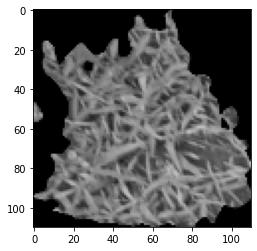

In [8]:
import matplotlib.pyplot as plt
validation_weed_images = []
validation_labels = [] 
for weed_dir_path in glob.glob("/content/weedandcrops1/test/*"):
    weed_label = weed_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(weed_dir_path, "*.tif")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        validation_weed_images.append(image)
        validation_labels.append(weed_label)
validation_weed_images = np.array(validation_weed_images)
plt.imshow(cv2.cvtColor(validation_weed_images[1], cv2.COLOR_GRAY2RGB))
plt.show()
validation_weed_images = validation_weed_images.reshape(len(validation_weed_images),-1)
validation_labels = np.array(validation_labels)



In [9]:
print(np.shape(validation_weed_images))

(55, 12100)


In [10]:
print(validation_weed_images[7])
print(validation_labels[7])
print(weed_images[7])
print(labels[7])
for i in range(1,55,30):
    check=clf.predict([weed_images[i]])
    print(check,"correct label", labels[i])

[0 0 0 ... 0 0 0]
grass
[0 0 0 ... 0 0 0]
grass
['grass'] correct label grass
['grass'] correct label grass


In [11]:
print(np.shape(validation_weed_images))

(55, 12100)


In [19]:
#Measuring the accuracy
count=0 
total = np.shape(validation_weed_images)[0]
#print(total)
for i in range(total):
    check=clf.predict([validation_weed_images[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
score = count/total
print(score)

29
0.5272727272727272
